In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime
import os

import warnings

/home/simon/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


118
118


/home/simon/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


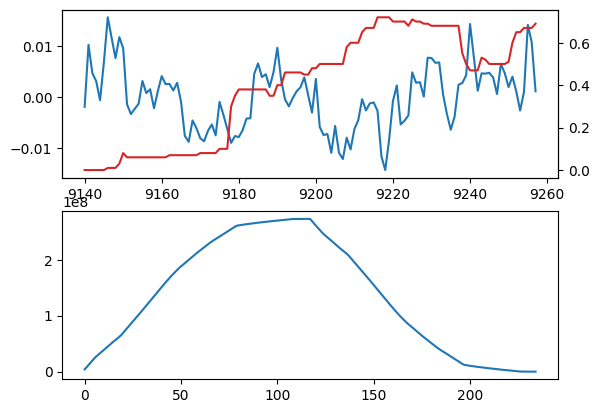

In [ ]:

data  = pd.read_csv('smhi-opendata_8_40_181970_20241206_130415.csv', sep=';')
#data  = pd.read_csv('onsala.csv', sep=';')
#data  = pd.read_csv('Kiruna.csv', sep=';')
#data  = pd.read_csv('Kiruna.csv', sep=';')

#data['Datum'] = pd.to_datetime(data['Datum'])

mask = (data['Datum'] >= '2022-11-01') & (data['Datum'] <= '2023-02-26')
data = data.loc[mask]

dir = "gps_data/GRE/"

data['gps_z'] = np.nan

idx_drop = []

for row in data.itertuples():
    try:
        file = open(dir + str(row[1]) + "_10KIR8.stacov", 'r')
        file_data = file.readlines()
        coords = file_data[3].split()
        #print(row[0])
        #print(row[1])
        #print(float(coords[4]))
        #data.loc['gps_z'][row[0]] = float(coords[4])
        data.at[row[0], 'gps_z'] = float(coords[4])
        file.close()
    except:
        print(row[1])
        print("couldnt find")
        idx_drop.append(row[0])
        continue

#data.drop(idx_drop)

    #print(type(coords[4]))
    



pd.to_datetime(data['Datum'])

cross = np.correlate(data['gps_z'], data['Snödjup'], mode='full')
mean = data['gps_z'].mean()
#fig, ax = plt.subplots(figsize=(5.4, 2),)
#datums = data['Datum']
#datums = pd.to_datetime(np.datetime64['ns'])

print(len(data['gps_z']))
print(len(data['Snödjup']))

avg_z = data['gps_z'].mean()
std_z = data['gps_z'].std()

avg_depth = data['Snödjup'].mean()
std_depth = data['Snödjup'].std()

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot((data['gps_z']-avg_z))


ax12 = ax1.twinx()
ax12.plot((data['Snödjup']), color='tab:red')


#print(type(data.at[8780, 'Datum']))

ax2.plot(cross)




ztd/GRE/2024-01-03_10KIR0.trp
ztd/GRE/2024-01-04_10KIR0.trp
ztd/GRE/2024-01-05_10KIR0.trp
ztd/GRE/2024-01-06_10KIR0.trp
ztd/GRE/2024-01-07_10KIR0.trp
ztd/GRE/2024-01-08_10KIR0.trp
ztd/GRE/2024-01-09_10KIR0.trp
ztd/GRE/2024-01-10_10KIR0.trp
ztd/GRE/2024-01-11_10KIR0.trp


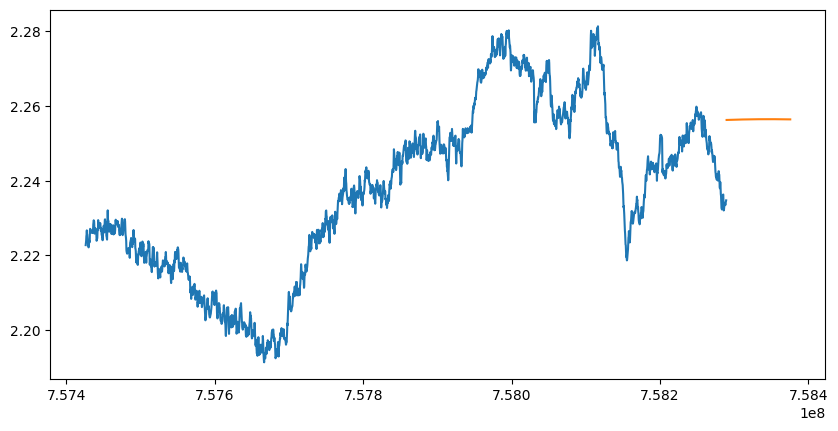

In [80]:
from datetime import date, timedelta
dir = "ztd/GRE/"

def daterange(start_date: date, end_date: date):
    days = int((end_date - start_date).days)
    for n in range(days):
        yield start_date + timedelta(n)
        

station1 = np.genfromtxt(dir + str(date(2024,1,2)) + "_10KIR0.trp", delimiter=' ', skip_header=1)
station2 = np.genfromtxt(dir + str(date(2024,1,2)) + "_10KIRU.trp", delimiter=' ', skip_header=1)

for datex in daterange(date(2024,1,3), date(2024,1,12)):
    print(dir + str(datex) + "_10KIR0.trp")
    stat1 = np.genfromtxt(dir + str(datex) + "_10KIR0.trp", delimiter=' ', skip_header=1)
    stat2 = np.genfromtxt(dir + str(datex) + "_10KIRU.trp", delimiter=' ', skip_header=1)
    #print(stat1)
    station1 = np.append(station1, stat1, axis=0)
    station2 = np.append(station2, stat2, axis=0)

temp1 = station1[:,1] + station1[:,3]
temp1 = station2[:,1] + station2[:,3]

x = np.arange(len(temp1))
err = station1[:,2]

stat1 = np.genfromtxt(dir + str(date(2024,1,12)) + "_10KIR8.trp", delimiter=' ', skip_header=1)

p = np.polyfit(station1[:,0], temp1, 2)

fitp = np.poly1d(p)

plt.figure().set_figwidth(10)

temp10 = fitp(stat1[:,0])
temp20 = stat1[:, 1]
temp30 = temp10

plt.plot(station1[:,0], temp1,'-', stat1[:,0], temp30)

